In [2]:
import cudf as pd
from cuml import train_test_split
from cuml.ensemble import RandomForestRegressor
from cuml.metrics import mean_squared_error
from cuml.preprocessing import StandardScaler

In [1]:
import sys
import torch
import sklearn
import matplotlib
import numpy as np

print("Python version:", sys.version)
print("PyTorch version:", torch.__version__)
# print("Selenium version:", selenium.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)


Python version: 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
PyTorch version: 2.1.0+cu121
scikit-learn version: 1.3.2
Matplotlib version: 3.7.2


In [8]:
def pe128(x):
    if x%2 == 0:
        y = np.sign(x/10000^(2 * x/128))
    else :
        y = np.cos(x/10000^(2 * x/128))
    return y
def pe256(x):
    if x%2 == 0:
        y = np.sign(x/10000^(2 * x/256))
    else :
        y = np.cos(x/10000^(2 * x/256))
    return y
def pe512(x):
    if x%2 == 0:
        y = np.sign(x/10000^(2 * x/512))
    else :
        y = np.cos(x/10000^(2 * x/512))
    return y

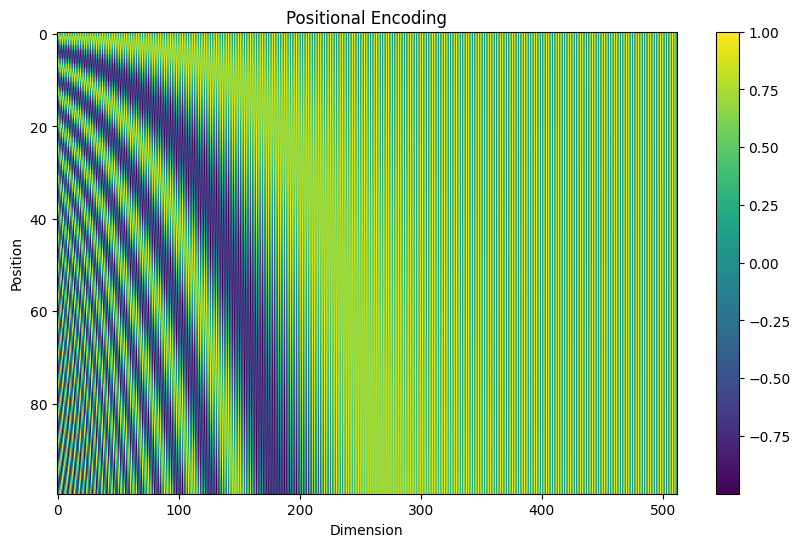

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(max_len, d_model):
    pos_enc = np.zeros((max_len, d_model))
    for pos in range(max_len):
        for i in range(d_model):
            if i % 2 == 0:
                pos_enc[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            else:
                pos_enc[pos, i] = np.cos(pos / (10000 ** ((i - 1) / d_model)))
    return pos_enc

max_len = 100  # 최대 문장 길이
d_model = 512  # 임베딩 벡터 차원

pos_enc = positional_encoding(max_len, d_model)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(pos_enc, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Positional Encoding")
plt.xlabel("Dimension")
plt.ylabel("Position")
plt.show()

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader

pe1 = torch.randint(1,2,(32,96,512))
pe2 = torch.randint(1,2,(32,96,512))
pe3 = torch.randint(1,2,(32,96,512))

print(pe.shape)
pe_ = torch.cat([pe,pe,pe],dim=0)
pe_.shape

torch.Size([1, 96, 512])


torch.Size([3, 96, 512])

In [26]:
pe1+pe2+pe3

tensor([[[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]],

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]],

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]],

        ...,

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]],

        [[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3,

In [20]:
import torch.nn as nn
embed = nn.Embedding(4,512)
pe_embed = embed(pe)
print(pe_embed.shape)
print(pe_embed)

torch.Size([1, 96, 512, 512])
tensor([[[[-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          ...,
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371]],

         [[-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          ...,
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],
          [-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371]],

         [[-0.3967, -0.2373, -0.4892,  ..., -0.4736,  0.4929,  0.9371],


In [21]:
class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h':4, 't':5, 's':6, 'm':1, 'a':1, 'w':2, 'd':3, 'b':3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model)
    
    def forward(self, x):
        return self.embed(x)

In [28]:
tfe.__class__

__main__.TimeFeatureEmbedding

In [24]:
tfe = TimeFeatureEmbedding(d_model=512, embed_type='timeF',freq='h')
pe_sq = pe.squeeze(0)
print(pe_sq.shape)
pe_tfe = tfe(pe_sq)
pe_tfe.shape

torch.Size([96, 512])


RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float